# Image Classification with CNN using Keras

# Task 1: Import Libraries

In [1]:
import tensorflow as tf
import os
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

if not os.path.isdir('models'):
    os.mkdir('models')
    
print('TensorFlow version:', tf.__version__)
print('Is using GPU?', tf.test.is_gpu_available())

TensorFlow version: 2.0.1
Is using GPU? False


# Task 2: Preprocess Data

In [3]:
def get_three_classes(x, y):
    indices_0, _ = np.where(y == 0.)
    indices_1, _ = np.where(y == 1.)
    indices_2, _ = np.where(y == 2.) 
    
  #indices_0, _ = np.where(y  ==  3.)
   #indices_1, _ = np.where(y ==  4.)
    #indices_2, _ = np.where(y == 5.)
    
     #indices_0, _ = np.where(y == 6.)
    #indices_1, _ = np.where(y == 7.)
    #indices_2, _ = np.where(y == 8.) 
    #indices_1, _ = np.where(y == 9.)
  
    
    indices = np.concatenate([indices_0, indices_1, indices_2], axis=0)
    
    x = x[indices]
    y = y[indices]
    
    count = x.shape[0]
    indices = np.random.choice(range(count), count, replace=False)
    
    x = x[indices]
    y = y[indices]
    
    y = tf.keras.utils.to_categorical(y)
    
    return x, y

In [5]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.cifar10.load_data()
x_train,y_train=get_three_classes(x_train,y_train)
x_test,y_test=get_three_classes(x_test,y_test)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)


(15000, 32, 32, 3) (15000, 3)
(3000, 32, 32, 3) (3000, 3)


# Task 3: Visualize Examples

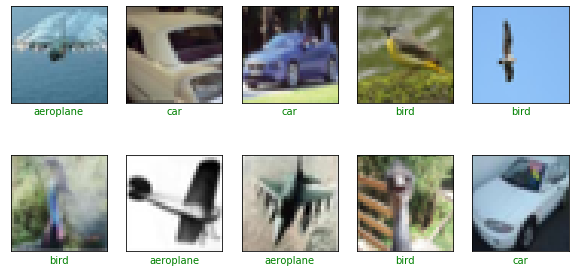

In [12]:
class_names = ['aeroplane', 'car', 'bird']

def show_random_examples(x,y,p):
    indices=np.random.choice(range(x.shape[0]),10,replace=False)
    
    x=x[indices]
    y=y[indices]
    p=p[indices]
    
    plt.figure(figsize=(10,5))
    for i in range(10):
        plt.subplot(2,5,1+i)
        plt.imshow(x[i])
        plt.xticks([])
        plt.yticks([])
        col='green' if np.argmax(y[i])==np.argmax(p[i]) else 'red'
        plt.xlabel(class_names[np.argmax(p[i])], color=col)
    plt.show()
show_random_examples(x_train,y_train,y_train)
        


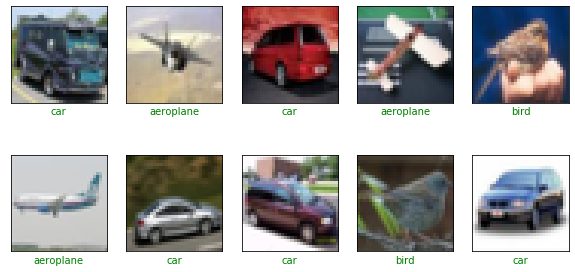

In [15]:
show_random_examples(x_test,y_test,y_test)

# Task 4: Create Model

In [23]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import Dropout, Flatten, Input, Dense

def create_model():
    def add_conv_block(model,num_filters):
        model.add(Conv2D(num_filters,3,activation='relu', padding='same'))
        model.add(BatchNormalization())
        model.add(Conv2D(num_filters,3,activation= 'relu'))
        model.add(MaxPooling2D(pool_size=2))
        model.add(Dropout(0.5))
        return model
    model=tf.keras.models.Sequential()
    model.add(Input(shape=(32,32,3)))
    model=add_conv_block(model,32)
    model=add_conv_block(model,64)
    model=add_conv_block(model,128)
    
    model.add(Flatten())
    model.add(Dense(3,activation='softmax'))
    
    model.compile(
        loss='categorical_crossentropy',
        optimizer='adam',metrics=['accuracy']
    )
    return model
model=create_model()
model.summary()
                         
        

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
batch_normalization_3 (Batch (None, 15, 15, 64)       

# Task 5: Train the Model

In [33]:
h =model.fit(
    x_train/255.,
    y_train,
    validation_data=(x_test/255.,y_test),
    epochs=6,batch_size=128,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3),
        tf.keras.callbacks.ModelCheckpoint(
            'models/model_(val_accuracy:.3f).h5',
        save_best_only=True, save_weights_only=False,
        monitor='val_accuracy'
        )
    ]
)
 


Train on 15000 samples, validate on 3000 samples
Epoch 1/6
15000/15000 [==============================] - 137s 9ms/sample - loss: 0.2791 - accuracy: 0.8912 - val_loss: 0.5118 - val_accuracy: 0.8270
Epoch 2/6
15000/15000 [==============================] - 133s 9ms/sample - loss: 0.2633 - accuracy: 0.8959 - val_loss: 0.3193 - val_accuracy: 0.8733
Epoch 3/6
15000/15000 [==============================] - 135s 9ms/sample - loss: 0.2536 - accuracy: 0.9015 - val_loss: 0.2618 - val_accuracy: 0.8917
Epoch 4/6
15000/15000 [==============================] - 134s 9ms/sample - loss: 0.2460 - accuracy: 0.9060 - val_loss: 0.3790 - val_accuracy: 0.8627
Epoch 5/6
15000/15000 [==============================] - 138s 9ms/sample - loss: 0.2333 - accuracy: 0.9093 - val_loss: 0.2576 - val_accuracy: 0.9030
Epoch 6/6
15000/15000 [==============================] - 139s 9ms/sample - loss: 0.2315 - accuracy: 0.9113 - val_loss: 0.5250 - val_accuracy: 0.8120


# Task 6: Final Predictions

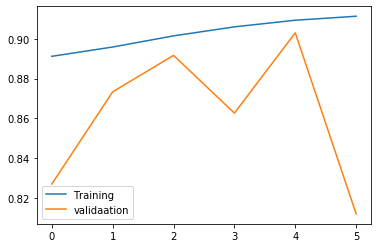

In [34]:
model.save('my_model.h5')
accs=h.history['accuracy']
val_accs=h.history['val_accuracy']

plt.plot(range(len(accs)),accs, label='Training')
plt.plot(range(len(val_accs)),val_accs, label='validaation')
plt.legend()
plt.show()

In [35]:
model=tf.keras.models.load_model('my_model.h5')

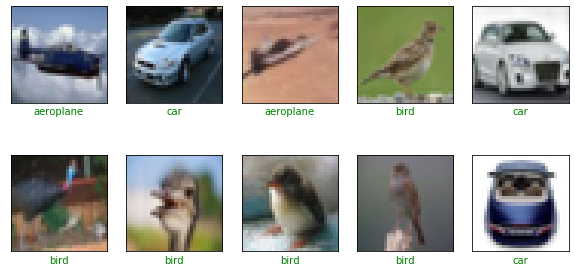

In [37]:
preds=model.predict(x_test/255.)
show_random_examples(x_test,y_test,y_test)